### Import Necessary Libraries:

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set up for better visualization
%matplotlib inline
sns.set_style("whitegrid")

### Load the Data:

In [26]:
df = pd.read_csv('../data/data.csv')  # Adjust the path as per your project structure

### Overview of the Data:

In [27]:
# Display the first few rows to understand what the data looks like
print(df.head())

# Get info on columns, non-null count, and data types
print(df.info())

# Check dataset dimensions
print(f"Number of Rows: {df.shape[0]}")
print(f"Number of Columns: {df.shape[1]}")

         TransactionId         BatchId       AccountId       SubscriptionId  \
0  TransactionId_76871   BatchId_36123  AccountId_3957   SubscriptionId_887   
1  TransactionId_73770   BatchId_15642  AccountId_4841  SubscriptionId_3829   
2  TransactionId_26203   BatchId_53941  AccountId_4229   SubscriptionId_222   
3    TransactionId_380  BatchId_102363   AccountId_648  SubscriptionId_2185   
4  TransactionId_28195   BatchId_38780  AccountId_4841  SubscriptionId_3829   

        CustomerId CurrencyCode  CountryCode    ProviderId     ProductId  \
0  CustomerId_4406          UGX          256  ProviderId_6  ProductId_10   
1  CustomerId_4406          UGX          256  ProviderId_4   ProductId_6   
2  CustomerId_4683          UGX          256  ProviderId_6   ProductId_1   
3   CustomerId_988          UGX          256  ProviderId_1  ProductId_21   
4   CustomerId_988          UGX          256  ProviderId_4   ProductId_6   

      ProductCategory    ChannelId   Amount  Value  TransactionStart

### Summary Statistics

In [28]:
# Summary statistics for numerical columns
print(df.describe())

# For categorical columns, you might want to look at unique values or counts
for col in df.select_dtypes(include=['object']).columns:
    print(f"\n{col}:")
    print(df[col].value_counts(dropna=False))

       CountryCode        Amount         Value  PricingStrategy   FraudResult
count      95662.0  9.566200e+04  9.566200e+04     95662.000000  95662.000000
mean         256.0  6.717846e+03  9.900584e+03         2.255974      0.002018
std            0.0  1.233068e+05  1.231221e+05         0.732924      0.044872
min          256.0 -1.000000e+06  2.000000e+00         0.000000      0.000000
25%          256.0 -5.000000e+01  2.750000e+02         2.000000      0.000000
50%          256.0  1.000000e+03  1.000000e+03         2.000000      0.000000
75%          256.0  2.800000e+03  5.000000e+03         2.000000      0.000000
max          256.0  9.880000e+06  9.880000e+06         4.000000      1.000000

TransactionId:
TransactionId
TransactionId_76871     1
TransactionId_74922     1
TransactionId_2737      1
TransactionId_28101     1
TransactionId_33267     1
                       ..
TransactionId_32860     1
TransactionId_139405    1
TransactionId_65784     1
TransactionId_8889      1
Transact

### Distribution of Numerical Features:

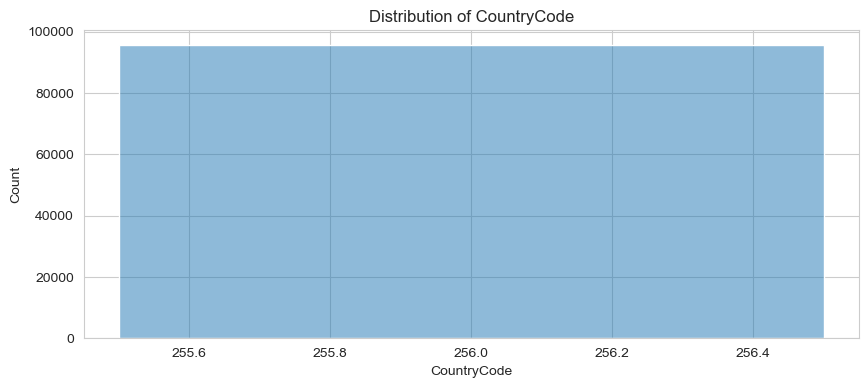

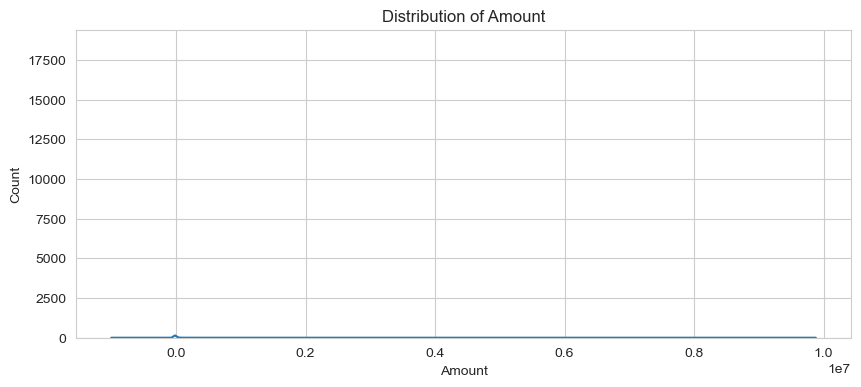

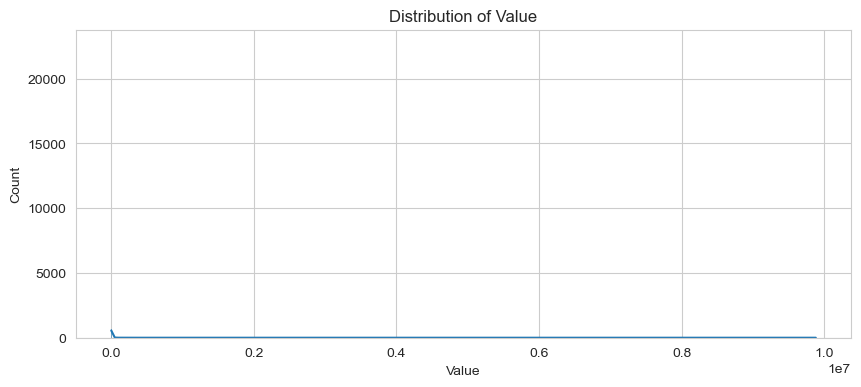

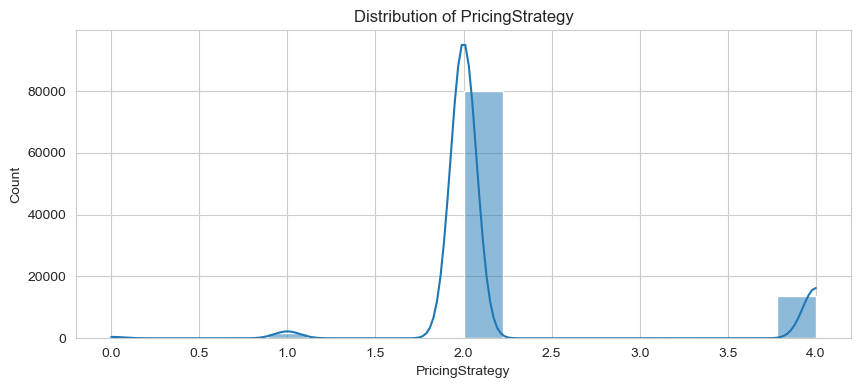

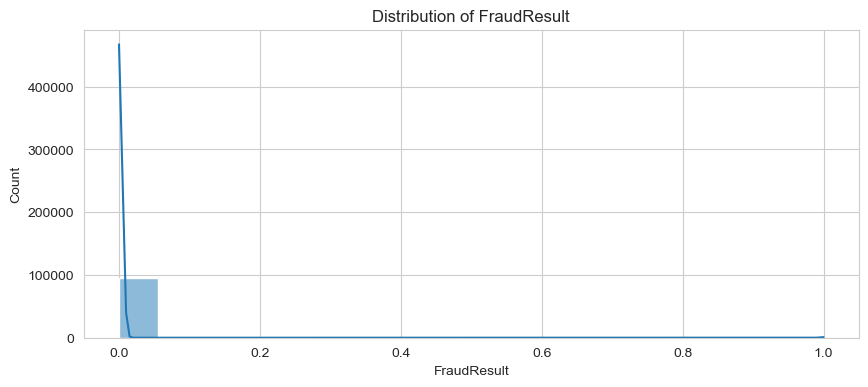

CountryCode         0.000000
Amount             51.098490
Value              51.291086
PricingStrategy     1.659057
FraudResult        22.196295
dtype: float64


In [29]:
# Histograms for numerical features
numerical_features = df.select_dtypes(include=[np.number]).columns
for feature in numerical_features:
    plt.figure(figsize=(10, 4))
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

# Check skewness
print(df[numerical_features].skew())

### Distribution of Categorical Features

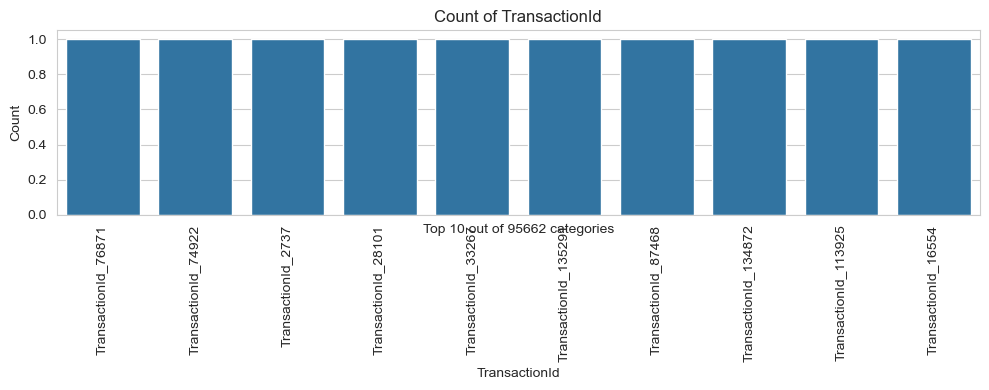

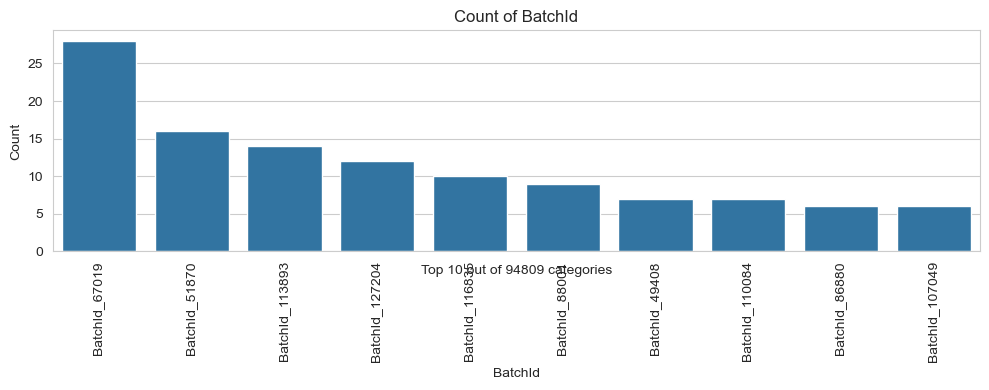

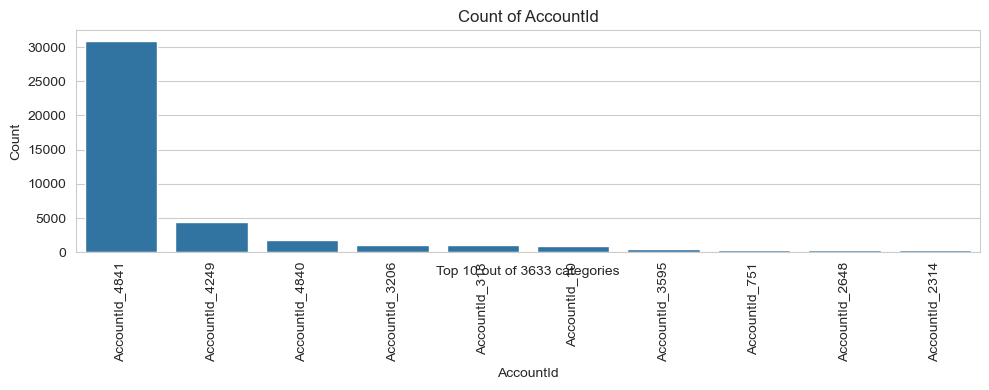

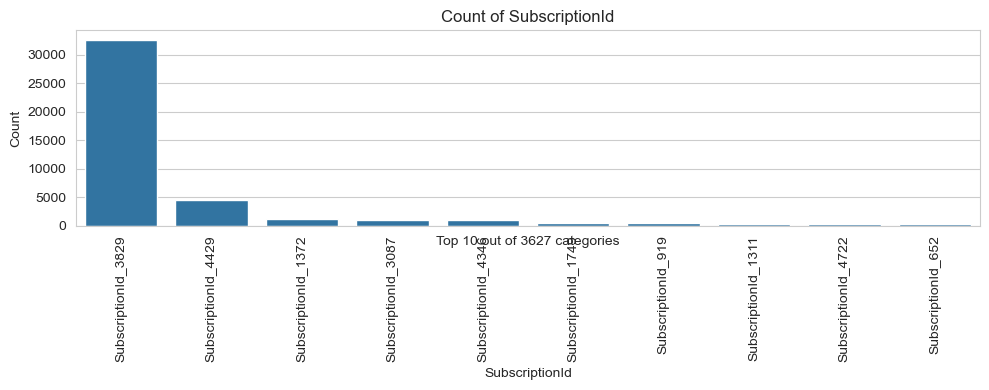

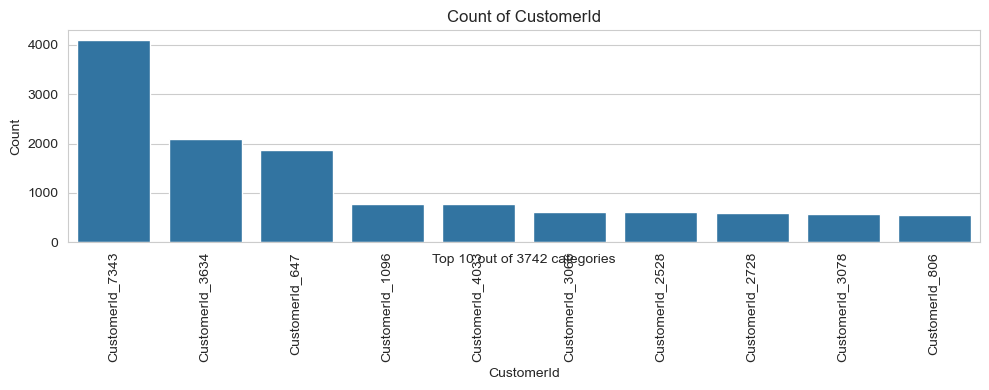

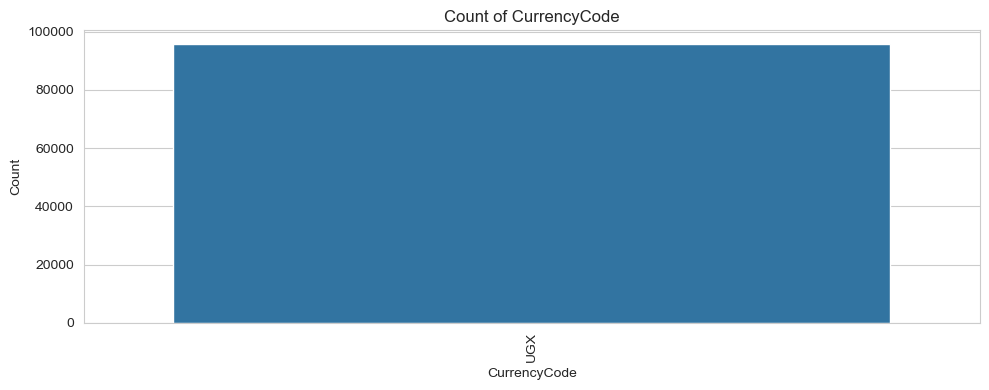

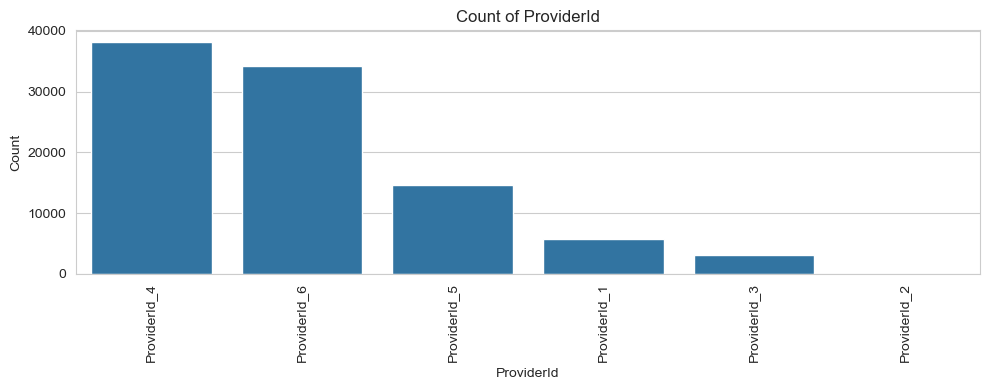

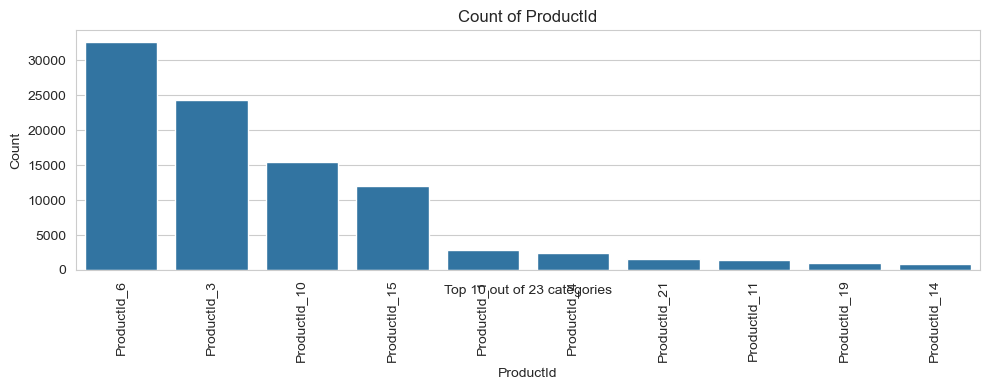

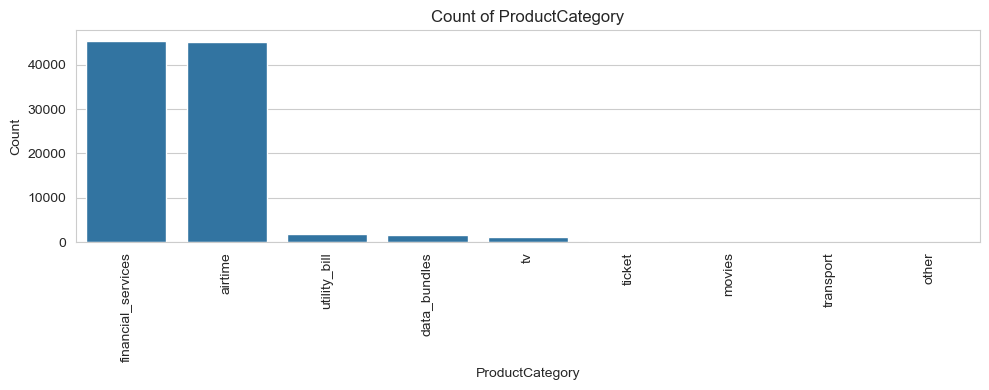

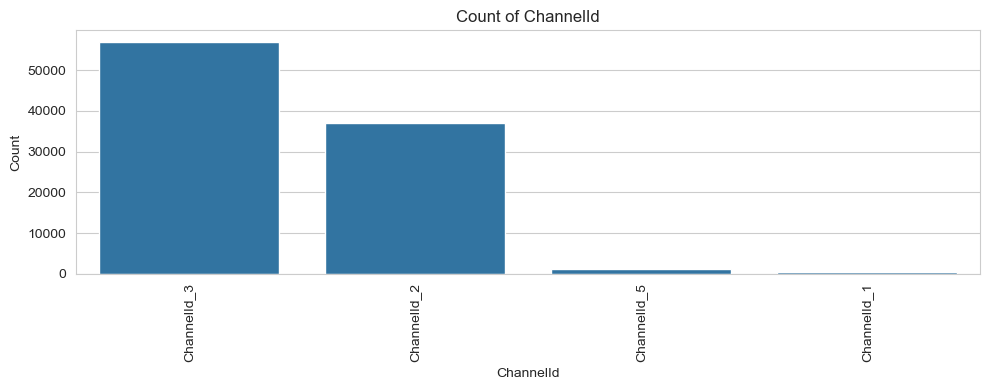

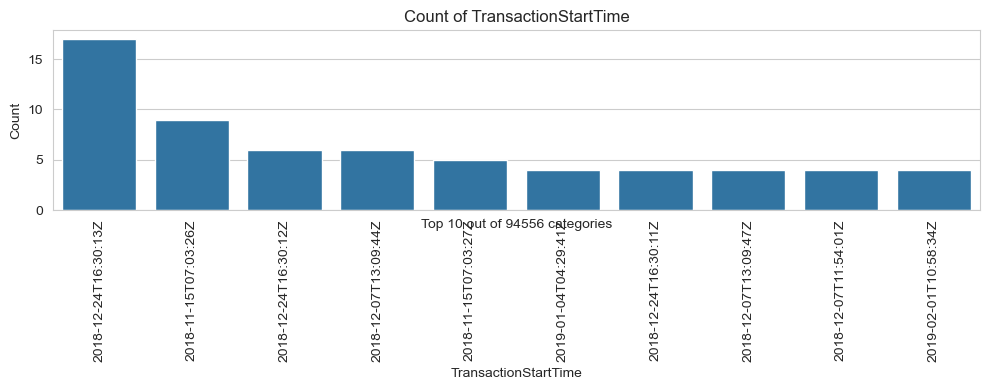

In [30]:

# Get categorical features
categorical_features = df.select_dtypes(include=['object']).columns

# Pre-compute value counts for each feature
value_counts = {feature: df[feature].value_counts() for feature in categorical_features}

for feature in categorical_features:
    plt.figure(figsize=(10, 4))
    # Plot only the top 10 categories to keep the visualization clean
    top_categories = value_counts[feature].nlargest(10)
    sns.barplot(x=top_categories.index, y=top_categories.values)
    plt.title(f'Count of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=90)

    # If there are more categories than shown, indicate it
    if len(value_counts[feature]) > 10:
        plt.text(0.5, -0.1, f"Top 10 out of {len(value_counts[feature])} categories", 
                 size=10, ha="center", transform=plt.gca().transAxes)

    plt.tight_layout()
    plt.show()

### Correlation Matrix:

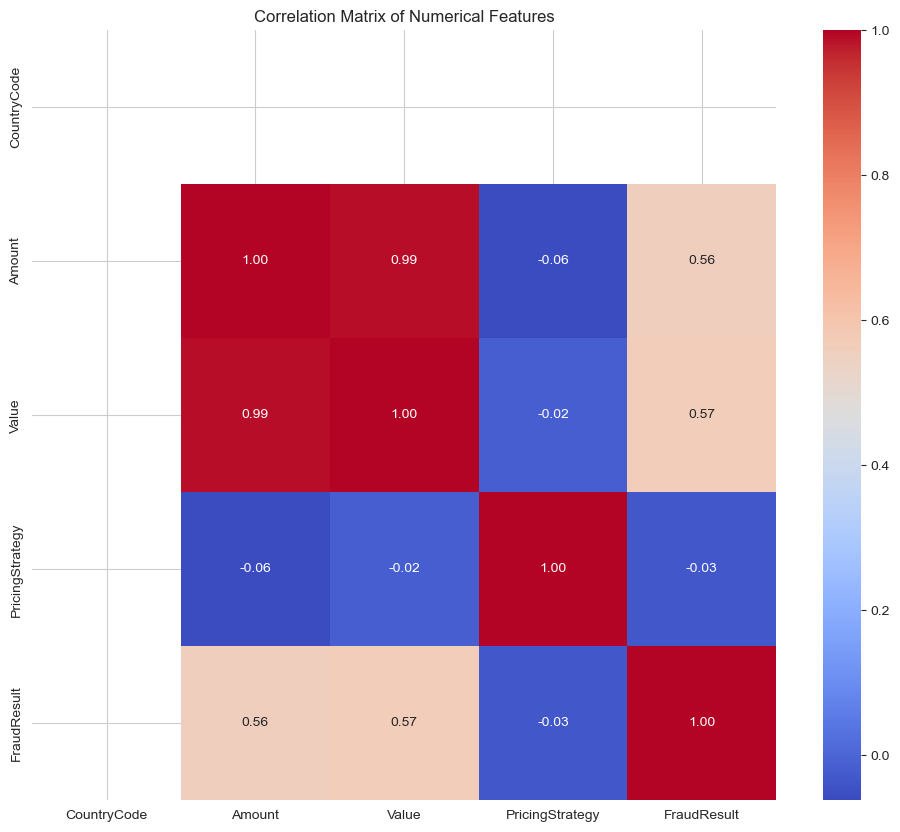

In [31]:

# Ensure numerical_features is correctly defined
numerical_features = df.select_dtypes(include=['number']).columns.tolist()  # Dynamically get numerical features

# Correlation heatmap for numerical features
plt.figure(figsize=(12, 10))
sns.heatmap(df[numerical_features].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

### Check for Missing Data:

In [32]:
# Advanced Data Cleaning Techniques
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
df_imputed = pd.DataFrame(imputer.fit_transform(df[numerical_features]), columns=numerical_features)
print("After KNN Imputation:")
print(df_imputed.isnull().sum())

After KNN Imputation:
CountryCode        0
Amount             0
Value              0
PricingStrategy    0
FraudResult        0
dtype: int64


### Outlier Detection

In [33]:
# Statistical Tests
from scipy.stats import f_oneway

# Example: Comparing mean transaction amounts across different channels
groups = [df[df['ChannelId'] == channel]['Amount'] for channel in df['ChannelId'].unique()]
f_val, p_val = f_oneway(*groups)
print(f'ANOVA p-value: {p_val}')

ANOVA p-value: 1.9874732445604265e-105


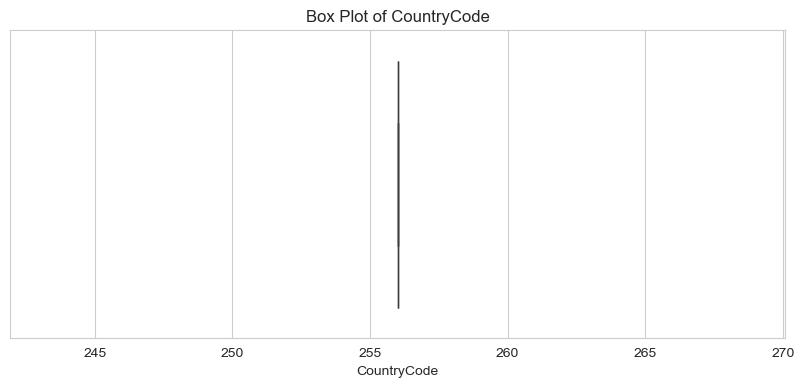

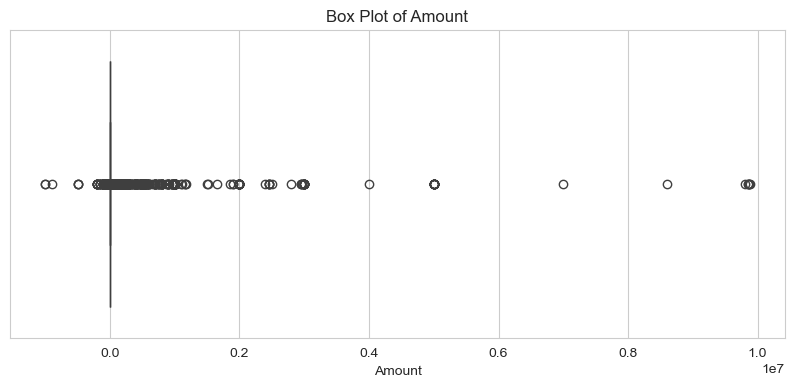

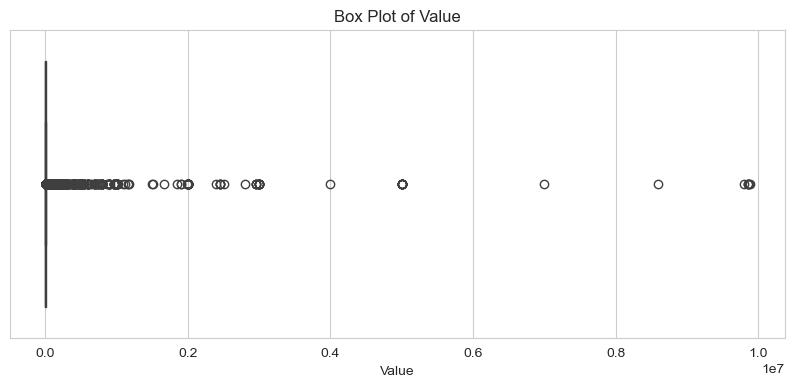

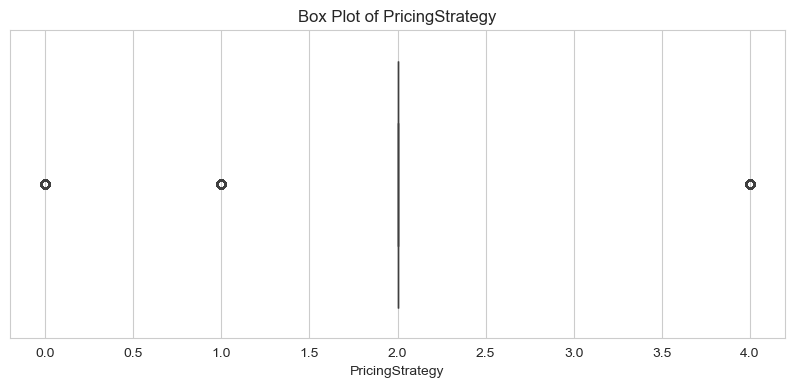

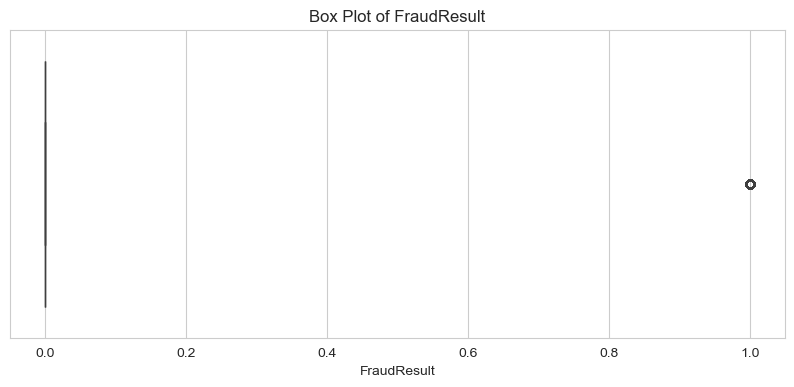

In [34]:
# Box plots for numerical features
for feature in numerical_features:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=df[feature])
    plt.title(f'Box Plot of {feature}')
    plt.show()